# Анализ авторства текстов (расширенная версия)
Этот блокнот анализирует два текстовых файла (`author_1.txt` и `author_2.txt`) с использованием частотности слов, биграмм/триграмм, анализа частей речи, длины предложений, нечёткого поиска и классификатора Naive Bayes.

## Установка зависимостей
Установите необходимые библиотеки и модель для русского языка в `spacy`:

In [ ]:
# !pip install nltk fuzzywuzzy python-Levenshtein matplotlib spacy scikit-learn
!python -m spacy download ru_core_news_sm

## Импорт библиотек и настройка
Импортируем библиотеки, загружаем данные NLTK и модель `spacy` для русского языка.

In [1]:
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.util import ngrams
from collections import Counter
import re
from fuzzywuzzy import fuzz
import spacy
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

# Загрузка данных NLTK
nltk.download('punkt')
nltk.download('stopwords')

# Загрузка модели spacy для русского языка
nlp = spacy.load('ru_core_news_sm')

# Установка отображения графиков в ноутбуке
%matplotlib inline

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\alexewd\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\alexewd\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Функции для анализа
Определяем функции для чтения, очистки и расширенного анализа текстов.

In [3]:
# Чтение текстового файла
def read_file(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        return file.read()

# Очистка текста
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)  # Удаляем знаки препинания
    return text

# Частотность слов
def word_frequency(text):
    words = word_tokenize(clean_text(text))
    stop_words = set(stopwords.words('russian'))  # Поддержка русского языка
    words = [word for word in words if word not in stop_words]
    return Counter(words)

# Биграммы и триграммы
def ngram_frequency(text, n=2):
    words = word_tokenize(clean_text(text))
    stop_words = set(stopwords.words('russian'))
    words = [word for word in words if word not in stop_words]
    n_grams = ngrams(words, n)
    return Counter(n_grams)

# Анализ частей речи (POS-tagging)
def pos_analysis(text, sample_size=1000):
    doc = nlp(text[:sample_size])
    pos_counts = Counter([token.pos_ for token in doc])
    return pos_counts

# Анализ длины предложений
def sentence_length_analysis(text):
    sentences = sent_tokenize(text)
    lengths = [len(word_tokenize(sent)) for sent in sentences]
    return sum(lengths) / len(lengths) if lengths else 0, lengths

# Нечёткое сравнение
def fuzzy_comparison(text1, text2, sample_size=1000):
    text1_chunk = clean_text(text1)[:sample_size]
    text2_chunk = clean_text(text2)[:sample_size]
    return fuzz.ratio(text1_chunk, text2_chunk)

## Основной анализ
Загружаем файлы и проводим расширенный анализ.

In [4]:
# Укажите пути к файлам
file1 = "f:\chatepc\chatalx\work\data\sevastopol.txt"
file2 = "f:\chatepc\chatalx\work\data\oblomov.txt"

# Чтение текстов
text1 = read_file(file1)
text2 = read_file(file2)

# Частотность слов
freq1 = word_frequency(text1)
freq2 = word_frequency(text2)
print(f"Топ-10 слов в {file1}: {freq1.most_common(10)}")
print(f"Топ-10 слов в {file2}: {freq2.most_common(10)}")

# Биграммы
bigrams1 = ngram_frequency(text1, n=2)
bigrams2 = ngram_frequency(text2, n=2)
print(f"Топ-5 биграмм в {file1}: {bigrams1.most_common(5)}")
print(f"Топ-5 биграмм в {file2}: {bigrams2.most_common(5)}")

# Тригаммы
trigrams1 = ngram_frequency(text1, n=3)
trigrams2 = ngram_frequency(text2, n=3)
print(f"Топ-5 триграмм в {file1}: {trigrams1.most_common(5)}")
print(f"Топ-5 триграмм в {file2}: {trigrams2.most_common(5)}")

# Анализ частей речи
pos1 = pos_analysis(text1)
pos2 = pos_analysis(text2)
print(f"Части речи в {file1}: {pos1}")
print(f"Части речи в {file2}: {pos2}")

# Пересечение общих слов
common_words = set(freq1.keys()) & set(freq2.keys())
print(f"Количество общих слов: {len(common_words)}")

# Анализ длины предложений
avg_len1, lengths1 = sentence_length_analysis(text1)
avg_len2, lengths2 = sentence_length_analysis(text2)
print(f"Средняя длина предложений в {file1}: {avg_len1:.2f} слов")
print(f"Средняя длина предложений в {file2}: {avg_len2:.2f} слов")

# Нечёткое сравнение
fuzzy_score = fuzzy_comparison(text1, text2)
print(f"Нечёткое сходство между текстами: {fuzzy_score}%")

Топ-10 слов в f:\chatepc\chatalx\work\data\sevastopol.txt: [('сказал', 201), ('это', 197), ('который', 108), ('офицер', 74), ('которые', 68), ('солдат', 60), ('очень', 60), ('володя', 56), ('франц', 54), ('ежели', 52)]
Топ-10 слов в f:\chatepc\chatalx\work\data\oblomov.txt: [('обломов', 910), ('это', 903), ('сказал', 552), ('захар', 469), ('илья', 318), ('говорил', 293), ('спросил', 272), ('ольга', 266), ('штольц', 264), ('ильич', 230)]
Топ-5 биграмм в f:\chatepc\chatalx\work\data\sevastopol.txt: [(('ваше', 'благородие'), 27), (('это', 'время'), 19), (('батарейный', 'командир'), 19), (('князь', 'гальцин'), 18), (('т', 'д'), 15)]
Топ-5 биграмм в f:\chatepc\chatalx\work\data\oblomov.txt: [(('илья', 'ильич'), 230), (('сказал', 'обломов'), 124), (('спросил', 'обломов'), 77), (('говорил', 'обломов'), 63), (('самом', 'деле'), 56)]
Топ-5 триграмм в f:\chatepc\chatalx\work\data\sevastopol.txt: [(('сказал', 'батарейный', 'командир'), 5), (('т', 'д', 'т'), 4), (('д', 'т', 'д'), 4), (('юнкер', 'б

## Визуализация
Строим гистограмму длины предложений и график частей речи.

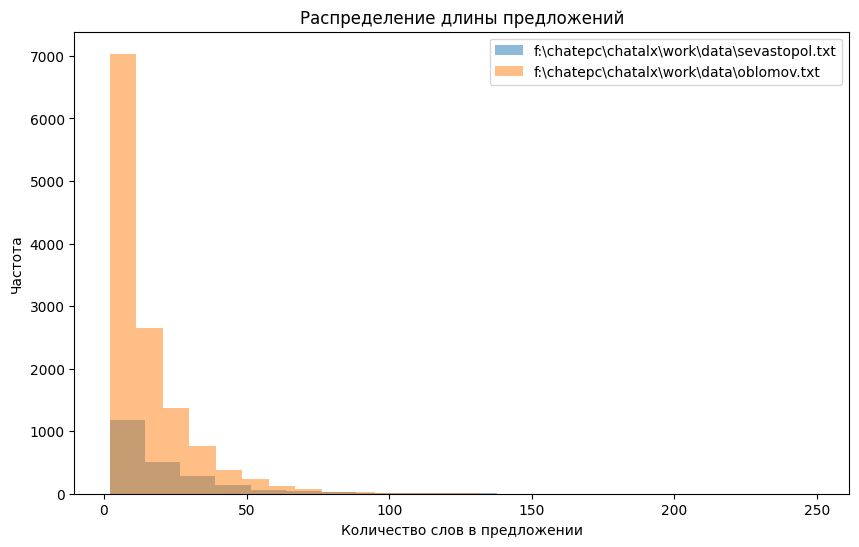

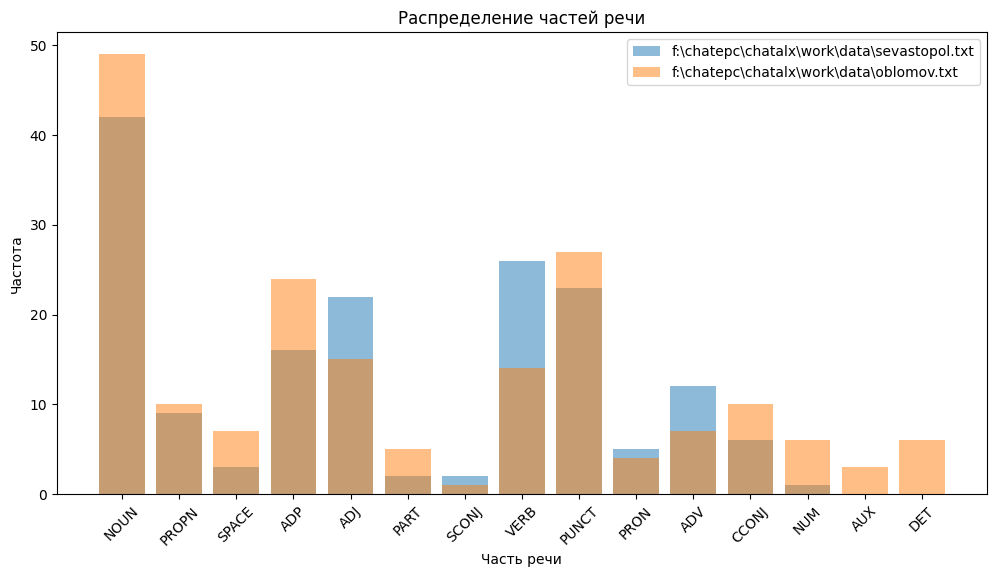

In [5]:
# Гистограмма длины предложений
plt.figure(figsize=(10, 6))
plt.hist(lengths1, bins=20, alpha=0.5, label=file1)
plt.hist(lengths2, bins=20, alpha=0.5, label=file2)
plt.legend(loc='upper right')
plt.title('Распределение длины предложений')
plt.xlabel('Количество слов в предложении')
plt.ylabel('Частота')
plt.show()

# График частей речи
pos1_labels, pos1_values = zip(*pos1.items())
pos2_labels, pos2_values = zip(*pos2.items())
plt.figure(figsize=(12, 6))
plt.bar(pos1_labels, pos1_values, alpha=0.5, label=file1)
plt.bar(pos2_labels, pos2_values, alpha=0.5, label=file2)
plt.legend(loc='upper right')
plt.title('Распределение частей речи')
plt.xlabel('Часть речи')
plt.ylabel('Частота')
plt.xticks(rotation=45)
plt.show()

## Машинное обучение (Naive Bayes)
Применяем классификатор для анализа авторства на основе TF-IDF признаков.

In [7]:
# Подготовка данных для классификации
texts = [text1, text2]
labels = [0, 1]  # Метки авторов (0 для author_1, 1 для author_2)

# Преобразование текста в TF-IDF
vectorizer = TfidfVectorizer(max_features=1000)
X = vectorizer.fit_transform(texts)

# Для примера разбиваем текст на части (в реальном случае нужны больше данных)
sentences1 = sent_tokenize(text1)[:500]  # Берем первые 50 предложений
sentences2 = sent_tokenize(text2)[:500]
X_sentences = vectorizer.transform(sentences1 + sentences2)
y_sentences = [0] * len(sentences1) + [1] * len(sentences2)

# Разделение на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X_sentences, y_sentences, test_size=0.3, random_state=42)

# Обучение модели Naive Bayes
clf = MultinomialNB()
clf.fit(X_train, y_train)

# Оценка точности
accuracy = clf.score(X_test, y_test)
print(f"Точность классификатора Naive Bayes: {accuracy:.2f}")

Точность классификатора Naive Bayes: 0.77
